## Correlation

Goal : Determine if two samples have a linear relationship.
    
### Pearson's R
    - 2 continuous variable
    
Explore the size and magnitude of Pearson's r :    https://www.rossmanchance.com/applets/2021/guesscorrelation/GuessCorrelation.html
    

$H_0$ : No linear relationship between the two samples.  
$H_a$ : A linear relationship exists between the two samples.

### <p style="background-color:pink;"> Example 1 : Students' exam scores
    
    

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

url = "https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv"
df_exam_scores = pd.read_csv(url)


In [6]:
df_exam_scores.head(5)

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


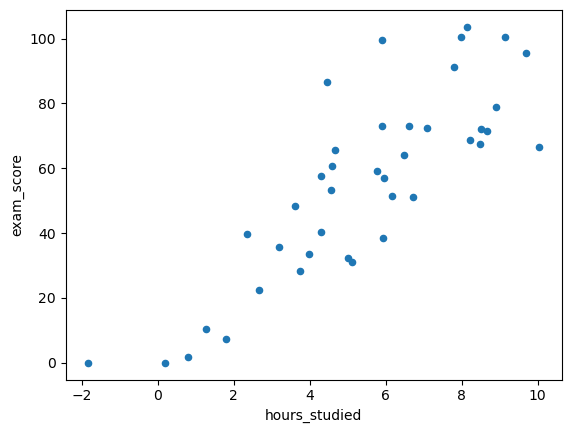

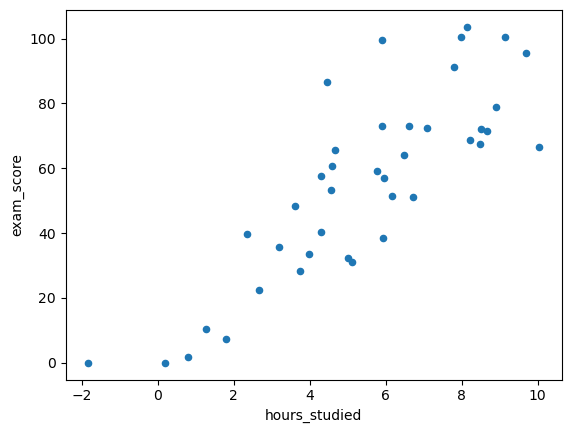

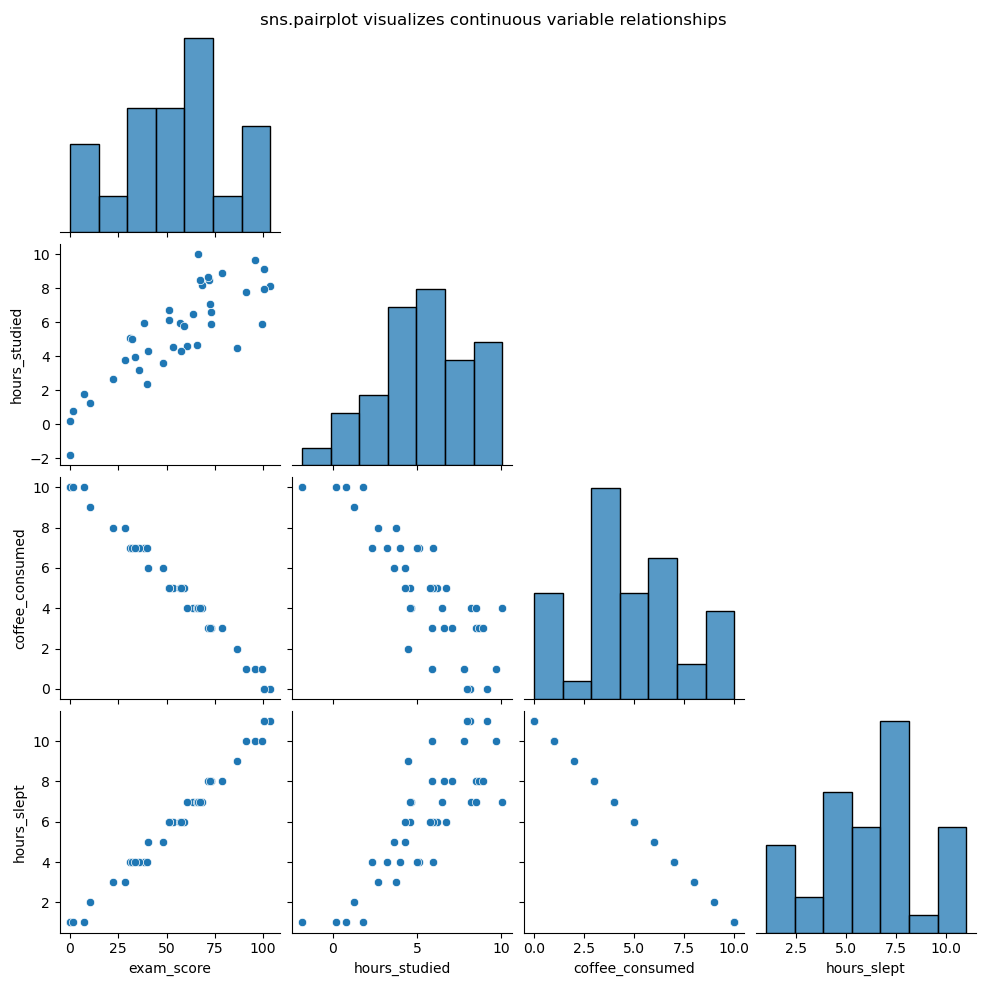

In [17]:
sns.pairplot(df, corner=True)
plt.suptitle("sns.pairplot visualizes continuous variable relationships")
plt.show()

# pairplots allow to view every variable as compared with every other variable ,
 # but can create confusion for non-data analysts

In [10]:
## Pre-set values

n = df_exam_scores.shape[0]       # Number of observations

degf = n - 2                      # Degrees of freedom : the number of values in the final calculation 
                                    # of a statistic that are free.
                                  ### n - 2 because there are 2 variables being handled. ###

conf_interval = 0.95              # Desired confidence interval

α = 1 - conf_interval

In [14]:
n

40

### Setting up the test for correlation

- number of hours studied
- exam score
   
$H_0$ : No linear relationship between hour studied and the exam score  
$H_a$ : There is a linear relationship between hour studied and the exam score

In [9]:
### Retrieve the x and y values that we will use :

x = df_exam_scores.hours_studied
y = df_exam_scores.exam_score



## Calculate intermediate values using
## a function that will find the std dev of a set of values :

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

### Apply the results to the formula for Pearson's r :

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy

# This is an example of 1 of the ways that the test can be performed

# This returns an r value (aka, Pearson's r coefficient) of 0.835.

0.8351498542413306

In [11]:
### Now, find a p-value : 

## Is it a result of chance (small p-value : reject the null, which is that there is 
                      ## no correlation / linear relationship, that the results are random), 
## or is it meaningful ?

t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy ** 2)
t


## T-statistic for exam scores and hours studied.
## Calculated with n - 2 (40 - 2) = 38 degrees of freedom.

9.359998377263368

In [12]:
### Find the p-value based on the t-statistic :

# T-statistic (t)
# Degrees of freedom (degf)

# Doubled the p-value for comparison.

p = stats.t.sf(t, df=degf) * 2             ###  * 2 for a two-tailed test
p


2.0762953315463266e-11

In [13]:
# Compare α 

p < α


True

### Conclusion :
    
    Reject the null hypothesis, reject that there is no linear relationship (aka, correlation).

In [28]:
### A visualisation of exam scores and hours studied

df_exam_scores.plot.scatter(y = 'exam_score', x = 'hours_studied')

%matplotlib inline

## Use scipy's ```stats``` module

#### This does the same thing as all the boxes above.

In [30]:
### Stats submodule of scipy
## Pearson's r

# Define x variable
# Define y variable

# Return correlation [between -1 and 1]

# return p-value

stats.pearsonr(x,y)

corr, p = stats.pearsonr(x, y)
corr, p


(0.8351498542413308, 2.0762953315462826e-11)

### <p style="background-color:pink;"> Non-Linear Relationship

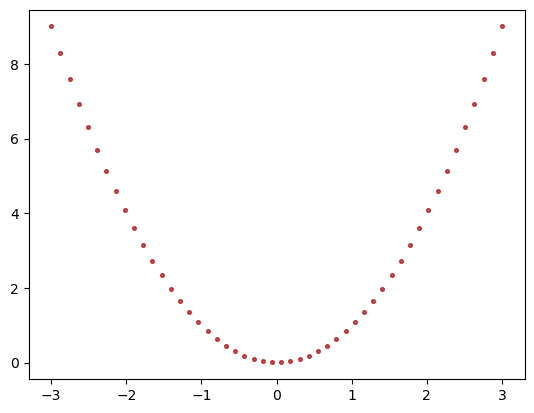

In [70]:


x = np.linspace(-3, 3)
y = x ** 2
plt.scatter(x, y, s=7, c='firebrick', alpha=.8)


In [38]:
r, p = stats.pearsonr(x, y)
print(f'The Pearson correlation coefficient = {r:.5f}')
print(f'The associated p-value = {p:.1f}')


The Pearson correlation coefficient = -0.00000
The associated p-value = 1.0


### <p style="background-color:pink;"> Example 2 : Coffee consumed and exam score

Text(8, 80, 'r = -0.994')

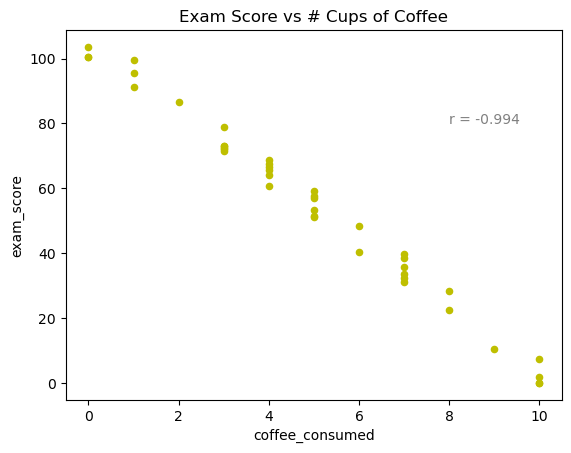

In [71]:
### Pearson's r and p-value

r, p = stats.pearsonr(df.coffee_consumed, df.exam_score)

# A scatter plot (these are good for linear relationships)
df.plot.scatter('coffee_consumed', 'exam_score', color = 'y')

# Format is y-variable vs x-variable
plt.title('Exam Score vs # Cups of Coffee')

# Displaly the Pearson's r
plt.text(8, 80,  f'r = {r:.3f}', color = 'grey')


### <p style="background-color:pink;"> Example 3 : Hours slept and exam score

In [50]:
# Generating Pearson's r and p-value for relationship between hours_slept and coffee_consumed
r_sleep_coffee, _ = stats.pearsonr(df.hours_slept, df.coffee_consumed)

# Generating Pearson's r and p-value for relationship between hours_slept and exam_score
r_sleep_score, _ = stats.pearsonr(df.hours_slept, df.exam_score)

print('Correlation between hours slept and coffee consumed :')
print(f'  r = {r_sleep_coffee:.3f}')

print('Correlation between hours slept and exam score :')
print(f'  r = {r_sleep_score:.3f}')

# Less hours slept and more coffee consumed : What the results show (correlation), but it's not causality.

Correlation between hours slept and coffee consumed :
  r = -1.000
Correlation between hours slept and exam score :
  r = 0.994


### <p style="background-color:pink;"> Example 4 : How much does one variable in fact affect another ?


Text(1, 63, 'p = 0.000000e+00')

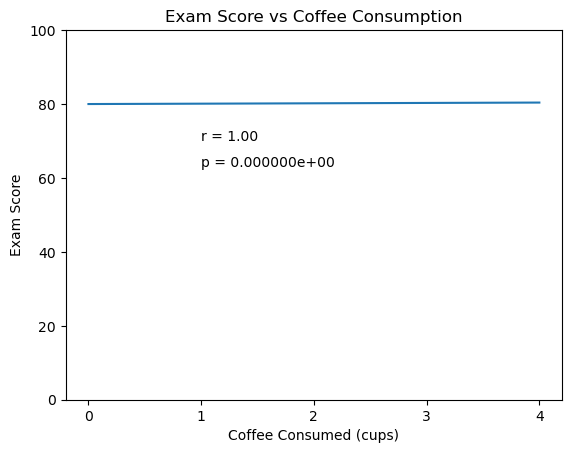

In [72]:
## Scale of a linear relationship

## Assign data values
cups_of_coffee = [0, 1, 2, 3, 4]
exam_score = [80, 80.1, 80.2, 80.3, 80.4]


# Calculate Pearson's r and the p-value
r, p = stats.pearsonr(cups_of_coffee, exam_score)


# Plot exam score vs coffee consumed
plt.plot(cups_of_coffee, exam_score)
plt.title('Exam Score vs Coffee Consumption')
plt.ylim(0, 100)
plt.xticks(range(5))
plt.xlabel('Coffee Consumed (cups)')
plt.ylabel('Exam Score')

plt.text(1, 70, f'r = {r:.2f}')
plt.text(1, 63, f'p = {p:e}')


### <p style="background-color:pink;"> Example 5 : Controlling for a variable : Handedness

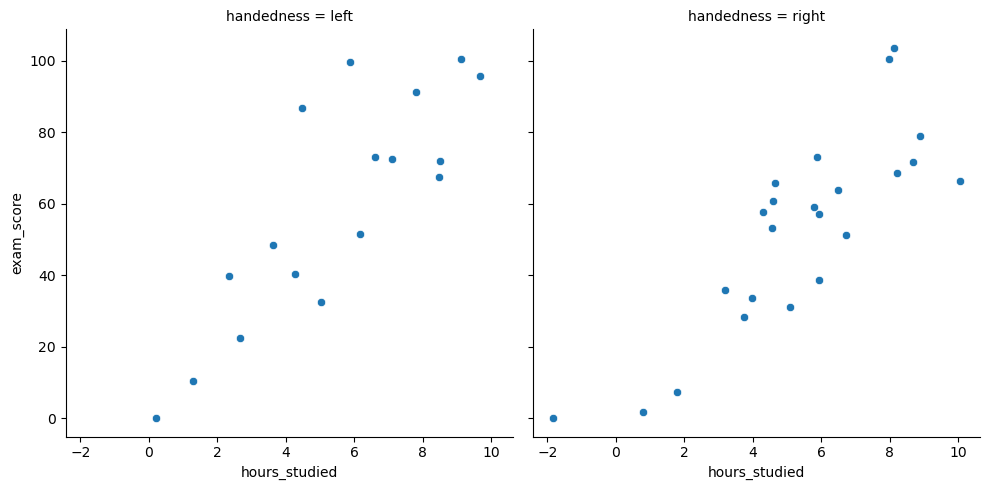

In [73]:
sns.relplot(data = df_exam_scores, y = 'exam_score', x = 'hours_studied', col = 'handedness')

# Shows difference between handedness to exam_score and hours_studied
# 'Col' is used to explore differences amongst categories

In [65]:
## Filter by handedness variable

lefties = df_exam_scores[df_exam_scores.handedness == 'left']
righties = df_exam_scores[df_exam_scores.handedness == 'right']

In [69]:
r, p = stats.pearsonr(lefties.exam_score, lefties.hours_studied)

print('Lefties')
print(' r = ', r)
print(' p = ', p)

Lefties
 r =  0.8389846518512478
 p =  2.561723682481375e-05


In [68]:
r, p = stats.pearsonr(righties.exam_score, righties.hours_studied)

print('Righties')
print(' r = ', r)
print(' p = ', p)

Righties
 r =  0.8407115600383273
 p =  5.114047317102283e-07
